In the code below, we make a time-discrete mono-frequency sinusoidal signal (25 Hz) with a given sampling interval ($\mathrm{Ts}$ = 0.001 sec). As a result, the frequency resolution ($\mathrm{df}$) is equal to 6.6 Hz,

$$\mathrm{df}=\frac{1}{\mathrm{T_{total}}}=\frac{1}{\mathrm{~T}_{\mathrm{s}} * \mathrm{~N}} = \frac{1}{0.001 * 150} = 6.6 \mathrm{~Hz}.$$

Considering the above properties for the signal, we plot the signal and its spectrum.



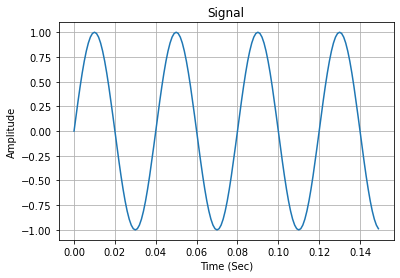

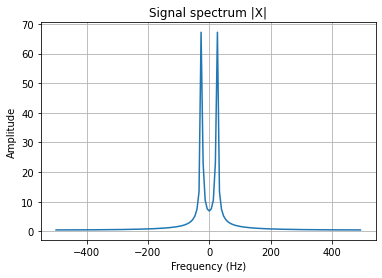

In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt  
from scipy.fft import fft, ifft, fftshift

f = 25
T_total = 0.15
Ts = 0.001
time_vec1 = np.arange(0, T_total, Ts)
N1 = len(time_vec1) #keep this length even
Amp = 1

x = Amp*np.sin(2*np.pi*f*time_vec1)

#plot signal
plt.plot(time_vec1,x)
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.title('Signal')
plt.grid(True)
plt.show()

X = fftshift(fft(x))
Fs = 1/Ts
FN = Fs/2
df1 = 1/(N1*Ts) #t_total = N*Ts
freq_vec = np.arange(-FN, FN, df1)

#plot spectrum
ax = plt.plot(freq_vec, abs(X))
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.title('Signal spectrum |X|')
plt.grid(True)
plt.show()

As is evident from the plotted spectrum above, while one expects to see two distinct spikes at +25 Hz and -25 Hz, the energy of the signal gets leaked to the neighboring frequency bins! This happens as the chosen frequency resolution ($\mathrm{df}$ = 6.6 Hz) is not able resolve 25 Hz sharply! This leak of energy to the neighboring frequency bins is called spectral leakage. To avoid this, we need to redefine our frequency resolution such that the x-axis of the spectrum can resolve the intended frequency (25 Hz).

In the following code block, the frequency resolution ($\mathrm{df}$) is redefined in order to correct the leak of energy in the spectrum.  

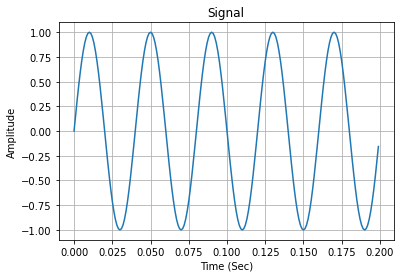

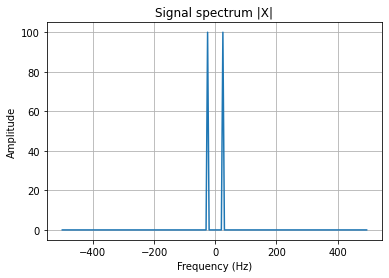

In [26]:
#for the previous time-domain signal without changing Ts,
#adjust df such that the x-axis of the spectrum plot includes the exact value of 25 Hz, ex. df = 5 Hz. 
df2 = 5
T_total2 = 1/df2
N2 = T_total2/Ts
time_vec2 = np.arange(0, T_total2, Ts)
x = Amp*np.sin(2*np.pi*f*time_vec2)

#plot signal
plt.plot(time_vec2,x)
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.title('Signal')
plt.grid(True)
plt.show()

X = fftshift(fft(x))
freq_vec = np.arange(-FN, FN, df2)

#plot spectrum
ax = plt.plot(freq_vec, abs(X))
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.title('Signal spectrum |X|')
plt.grid(True)
plt.show()

Now, the frequency resolution can resolve 25 Hz sharply!